In [1]:
%load_ext autoreload
%matplotlib inline

# Example usage of DeepLabCut -analysis

## Extract positions on a video using a trained model

Open anaconda prompt and `activate deeplabcut` and navigate to the DeepLabCut folder:

`cd Documents\apps\DeepLabCut-master\Analysis-tools`

Then you need to set a couple of environment variables:
`set TF_CUDNN_USE_AUTOTUNE=0`
`set CUDA_VISIBLE_DEVICES=0`

Crop the videos using ....

Now we are ready to run the DeepLabCut model on the new video.

Place all the videos you want to analyse in `DeepLabCut-master/videos`. Check the settings in `DeepLabCut-master/myconfig_analysis.py`.

Now run AnalyzeVideos:

`python AnalyzeVideos.py`

The output labels should be saved in the video as csv files and can be uploaded in Python

In [2]:
import matplotlib.pylab as plt
import numpy as np
import scipy as sc
import os

from settings import DATA_FOLDER_NAME
from dlca.readers import DLCsv

In [3]:
local_file = DLCsv('test_tracking.csv', path=DATA_FOLDER_NAME)

In [4]:
import matplotlib.pylab as plt


plt.show()

In [5]:
rw = local_file.raw_df

x_n = rw.nose.x
y_n = rw.nose.y

time = np.arange(len(x_n))

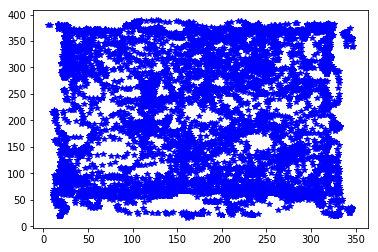

In [6]:
plt.plot(x_n, y_n, 'b*')

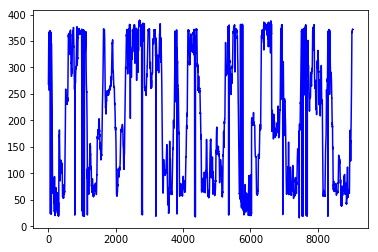

In [7]:
plt.plot(time, y_n, 'b-')

In [8]:
clean = local_file.clean(min_like=0.95, max_vel=80, save=False)
x = clean.loc[:, ('nose', 'x')].values
y = clean.loc[:, ('nose', 'y')].values

velocity = np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2)
time_v = np.arange(len(x_n)-1)

print(np.where(velocity > 80))
x_nc = clean.nose.x
y_nc = clean.nose.y

[294, 295, 299, 308]
294
[1015, 1016, 1047, 1057, 1058, 1069, 1070, 1156, 1158]
1015
1047
1047
False
1057
1069
[2783, 2784, 2785]
2783
[4341, 4353, 4364, 4365]
4341
skipped 4341 4353
4353
4353
False
[5348, 5349, 5350, 5351]
5348
[5861, 5903, 5904, 5934, 5940, 5973, 5974, 5980, 5981, 5983, 5985, 6030, 6031, 6032]
5861
skipped 5861 5903
5903
5934
5934
6.668921303781844
23.26714425095025
nan
5940
5940
False
5973
5980
5983
6030
(array([ 294,  295,  782,  783,  784,  785, 1015, 1016, 1057, 1058, 1069,
       1070, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792,
       2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803,
       2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814,
       2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825,
       2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
       2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 3822, 3823,
       3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832,

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


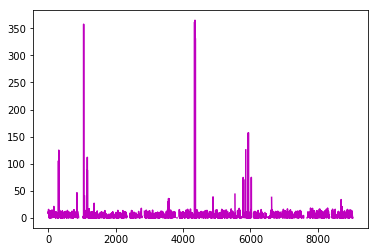

In [9]:
plt.plot(time_v, velocity, 'm-')

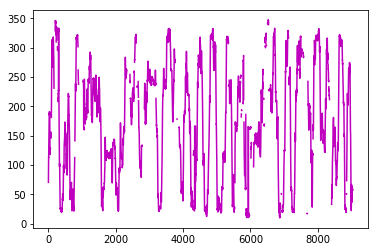

In [10]:
plt.plot(time, x_nc, 'm-')

In [11]:
np.where(velocity > 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([ 298,  307, 1046, 1155, 4340, 4352, 4363, 4364, 5860, 5933, 5939],
       dtype=int64),)

In [12]:
int_pol = local_file.interpolate(method='linear', save=False)
x = int_pol.loc[:, ('nose', 'x')].values
y = int_pol.loc[:, ('nose', 'y')].values

velocity = np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2)

x_ni = int_pol.nose.x
y_ni = int_pol.nose.y

print(np.where(velocity > 200))

[294, 295, 299, 308]
294
[1015, 1047, 1057, 1058, 1069, 1070, 1156]
1015
1015
11.774630924182416
22.674740012202943
nan
1047
1047
False
1057
1069
[4341, 4353, 4364, 4365]
4341
skipped 4341 4353
4353
4353
False
[5861, 5903, 5904, 5934, 5940, 5974, 5980, 5981, 5983, 5985, 6030, 6031, 6032]
5861
skipped 5861 5903
5903
5934
5934
6.674099211824862
23.26714425095025
nan
5940
5940
32.31167854676727
7.335893241208388
nan
5974
5974
False
5980
5983
6030
[6453, 6454, 6457, 6458]
6453
(array([ 294,  295,  782,  783,  784,  785, 1057, 1058, 1069, 1070, 1156,
       1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167,
       1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178,
       1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
       1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200,
       1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211,
       1212, 1213, 1214, 1215, 1216, 2784, 2785, 3822, 3823, 3824, 3825,
       382

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


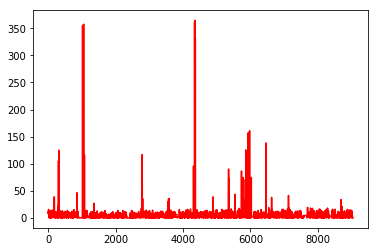

In [13]:
plt.plot(time_v, velocity, 'r-')

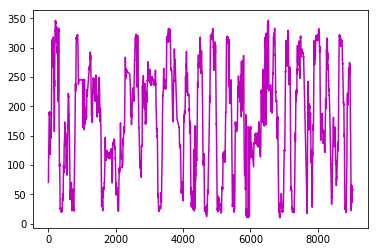

In [14]:
plt.plot(time, x_ni, 'm-')